In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import statsmodels.api as sm
%matplotlib inline 

/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
seaborn.set()

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

In [4]:
df_train = pd.read_csv("train.csv", parse_dates=[0], index_col=0,date_parser=dateparse)

In [5]:
df_train

,Ambient (°F),E (W/m²)
date,,
2003-01-01,64.400,559.4
2003-01-02,69.700,558.4
2003-01-03,74.500,556.6
2003-01-04,77.000,549.5
2003-01-05,74.200,554.3
2003-01-06,65.800,606.5
2003-01-07,75.700,581.7
2003-01-08,64.500,494.6
2003-01-09,66.000,619.2


In [6]:
dfAmbient = df_train[["Ambient (°F)"]]

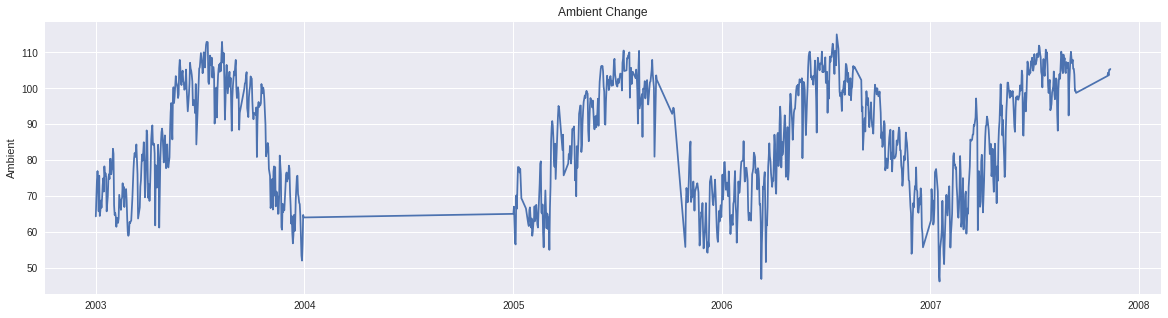

In [7]:
plt.figure(figsize=(20,5))
plt.plot(dfAmbient.index,dfAmbient["Ambient (°F)"])
plt.ylabel("Ambient")
plt.title("Ambient Change");
plt.show()

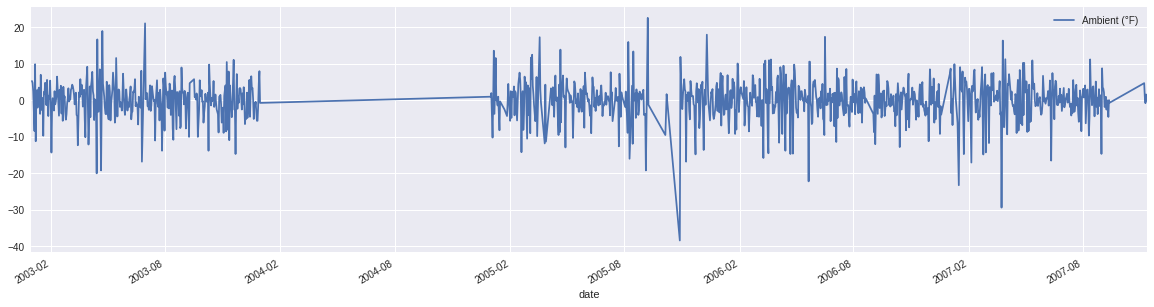

In [8]:
fig = plt.figure(figsize=(20,5))
ax1= fig.add_subplot(111)
diff1 = dfAmbient.diff()
diff1.plot(ax=ax1)

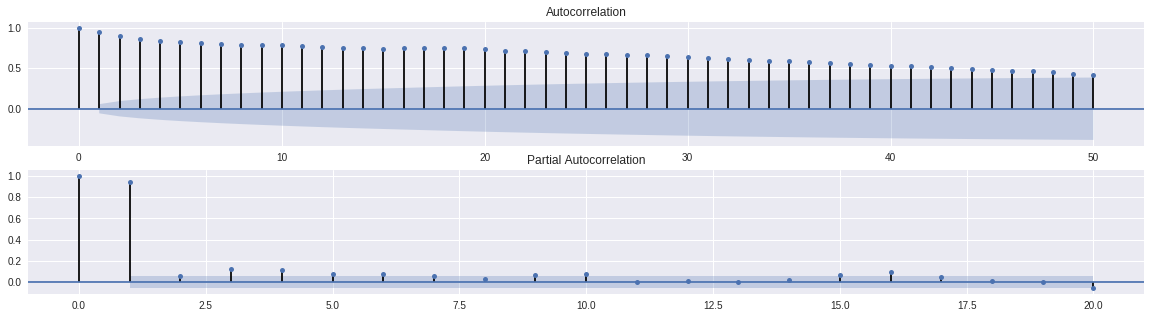

In [9]:
fig = plt.figure(figsize=(20,5))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dfAmbient,lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dfAmbient,lags=20,ax=ax2)

In [10]:
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

In [11]:
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [12]:
seasonal_pdq[1]

(0, 0, 1, 12)

In [13]:
maps = {}
for param in pdq:
    for parmas_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dfAmbient, order=param,
                                           seasonal_order = parmas_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility = False)
            result = mod.fit()
            maps["AIRMA{}x{}12".format(param, parmas_seasonal)] = result.aic
            print("AIRMA{}x{}12-AIC:{}".format(param, parmas_seasonal, result.aic))
        except:
            continue

AIRMA(0, 0, 0)x(0, 0, 1, 12)12-AIC:12650.193501629106
AIRMA(0, 0, 0)x(0, 1, 1, 12)12-AIC:8750.846833361504
AIRMA(0, 0, 0)x(1, 0, 0, 12)12-AIC:8989.386782269832
AIRMA(0, 0, 0)x(1, 0, 1, 12)12-AIC:8833.663164912195
AIRMA(0, 0, 0)x(1, 1, 0, 12)12-AIC:8739.496159465776
AIRMA(0, 0, 0)x(1, 1, 1, 12)12-AIC:8732.99347437487
AIRMA(0, 0, 1)x(0, 0, 0, 12)12-AIC:12572.720441453852
AIRMA(0, 0, 1)x(0, 0, 1, 12)12-AIC:11231.842059982602
AIRMA(0, 0, 1)x(0, 1, 0, 12)12-AIC:8329.548508209456
AIRMA(0, 0, 1)x(0, 1, 1, 12)12-AIC:8029.159702856905
AIRMA(0, 0, 1)x(1, 0, 0, 12)12-AIC:8341.914602023284


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AIRMA(0, 0, 1)x(1, 0, 1, 12)12-AIC:8360.324768798393
AIRMA(0, 0, 1)x(1, 1, 0, 12)12-AIC:8044.072327618336
AIRMA(0, 0, 1)x(1, 1, 1, 12)12-AIC:8014.707953320827
AIRMA(0, 1, 0)x(0, 0, 1, 12)12-AIC:7346.022322423994
AIRMA(0, 1, 0)x(0, 1, 1, 12)12-AIC:7322.167600556485
AIRMA(0, 1, 0)x(1, 0, 0, 12)12-AIC:7351.284822862995
AIRMA(0, 1, 0)x(1, 0, 1, 12)12-AIC:7347.164806431575
AIRMA(0, 1, 0)x(1, 1, 0, 12)12-AIC:7741.35973305321
AIRMA(0, 1, 0)x(1, 1, 1, 12)12-AIC:7323.470026233321
AIRMA(0, 1, 1)x(0, 0, 0, 12)12-AIC:7403.051411717517
AIRMA(0, 1, 1)x(0, 0, 1, 12)12-AIC:7331.460163162756
AIRMA(0, 1, 1)x(0, 1, 0, 12)12-AIC:8142.14521241473
AIRMA(0, 1, 1)x(0, 1, 1, 12)12-AIC:7306.145134162049
AIRMA(0, 1, 1)x(1, 0, 0, 12)12-AIC:7342.34268433389
AIRMA(0, 1, 1)x(1, 0, 1, 12)12-AIC:7332.169699458231
AIRMA(0, 1, 1)x(1, 1, 0, 12)12-AIC:7732.652680092339
AIRMA(0, 1, 1)x(1, 1, 1, 12)12-AIC:7307.843490930902
AIRMA(1, 0, 0)x(0, 0, 0, 12)12-AIC:7426.732030319609
AIRMA(1, 0, 0)x(0, 0, 1, 12)12-AIC:7352.579737609

In [16]:
sorted(maps.items(), key=lambda x: x[1])

[('AIRMA(1, 1, 1)x(0, 1, 1, 12)12', 7227.8974153075633),
 ('AIRMA(1, 1, 1)x(1, 1, 1, 12)12', 7229.8787207205742),
 ('AIRMA(1, 1, 1)x(0, 0, 1, 12)12', 7250.4287224130821),
 ('AIRMA(1, 1, 1)x(1, 0, 1, 12)12', 7251.4736408617991),
 ('AIRMA(1, 1, 1)x(1, 0, 0, 12)12', 7256.2565785926436),
 ('AIRMA(1, 0, 1)x(0, 1, 1, 12)12', 7286.4268712379653),
 ('AIRMA(1, 0, 1)x(1, 1, 1, 12)12', 7288.1620356846252),
 ('AIRMA(1, 0, 0)x(0, 1, 1, 12)12', 7295.4167963421896),
 ('AIRMA(1, 0, 0)x(1, 1, 1, 12)12', 7296.625123234423),
 ('AIRMA(0, 1, 1)x(0, 1, 1, 12)12', 7306.1451341620486),
 ('AIRMA(0, 1, 1)x(1, 1, 1, 12)12', 7307.8434909309017),
 ('AIRMA(1, 1, 0)x(0, 1, 1, 12)12', 7315.5509678580092),
 ('AIRMA(1, 1, 0)x(1, 1, 1, 12)12', 7317.4289687151286),
 ('AIRMA(1, 1, 1)x(0, 0, 0, 12)12', 7322.0425220832667),
 ('AIRMA(0, 1, 0)x(0, 1, 1, 12)12', 7322.167600556485),
 ('AIRMA(0, 1, 0)x(1, 1, 1, 12)12', 7323.4700262333208),
 ('AIRMA(0, 1, 1)x(0, 0, 1, 12)12', 7331.4601631627556),
 ('AIRMA(0, 1, 1)x(1, 0, 1, 12)12

In [17]:
mode = sm.tsa.statespace.SARIMAX(dfAmbient, order=(1, 1, 1),seasonal_order=(0, 1, 1, 12),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
result = mode.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6809   3312.258      0.000      1.000   -6491.226    6492.588
ma.L1         -0.8920   2.86e+10  -3.12e-11      1.000    -5.6e+10     5.6e+10
ma.S.L12      -1.0289   2.67e+10  -3.86e-11      1.000   -5.23e+10    5.23e+10
sigma2        25.4616   1.28e+09   1.99e-08      1.000   -2.51e+09    2.51e+09


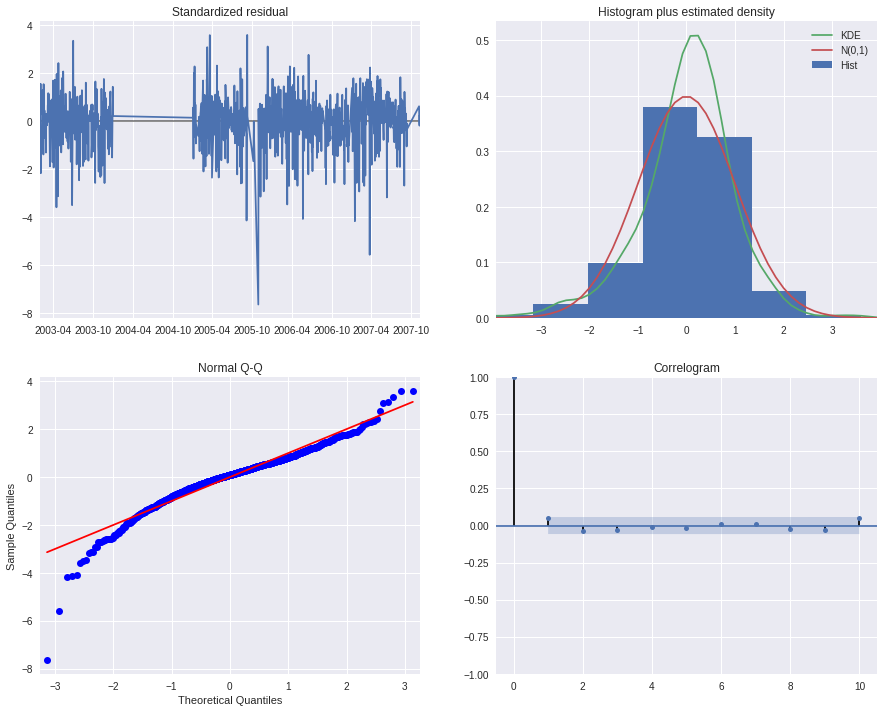

In [18]:
result.plot_diagnostics(figsize=(15,12))
plt.show()

In [20]:
pred = result.get_prediction(start=pd.to_datetime("2006-01-01"),dynamic=False)
pred_ci = pred.conf_int()

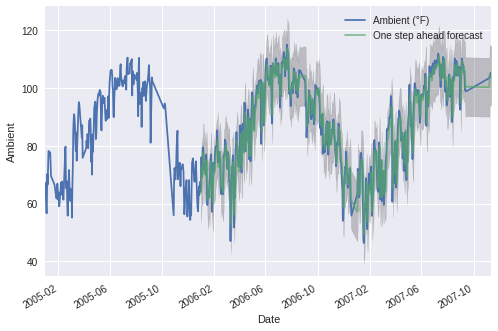

In [23]:
ax = dfAmbient["2004":].plot(label="observed")
pred.predicted_mean.plot(ax=ax, label="One step ahead forecast",alpha=0.7)
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color="k",alpha=0.2)
ax.set_xlabel("Date")
ax.set_ylabel("Ambient")
plt.legend()
plt.show()

In [25]:
forcast = pred.predicted_mean
truth = dfAmbient["2006-01-01":]

In [64]:
forcast = forcast.values.tolist()
truth = truth.values.tolist()
from sklearn.metrics import mean_squared_error
mean_squared_error(truth,forcast)

25.119259441297871

In [36]:
dfIr = df_train[["E (W/m²)"]]

In [37]:
maps = {}
for param in pdq:
    for parmas_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dfIr, order=param,
                                           seasonal_order = parmas_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility = False)
            result = mod.fit()
            maps["AIRMA{}x{}12".format(param, parmas_seasonal)] = result.aic
            print("AIRMA{}x{}12-AIC:{}".format(param, parmas_seasonal, result.aic))
        except:
            continue

AIRMA(0, 0, 0)x(0, 0, 1, 12)12-AIC:18273.260886612137
AIRMA(0, 0, 0)x(0, 1, 1, 12)12-AIC:14759.091131355664
AIRMA(0, 0, 0)x(1, 0, 0, 12)12-AIC:15171.0431198689
AIRMA(0, 0, 0)x(1, 0, 1, 12)12-AIC:14907.247753852247
AIRMA(0, 0, 0)x(1, 1, 0, 12)12-AIC:14808.209274079189
AIRMA(0, 0, 0)x(1, 1, 1, 12)12-AIC:14753.12496853699
AIRMA(0, 0, 1)x(0, 0, 0, 12)12-AIC:18375.599020350783
AIRMA(0, 0, 1)x(0, 0, 1, 12)12-AIC:17263.478393832287
AIRMA(0, 0, 1)x(0, 1, 0, 12)12-AIC:15011.418981138258
AIRMA(0, 0, 1)x(0, 1, 1, 12)12-AIC:14542.251763118156
AIRMA(0, 0, 1)x(1, 0, 0, 12)12-AIC:15030.89122979497
AIRMA(0, 0, 1)x(1, 0, 1, 12)12-AIC:14687.646316049328
AIRMA(0, 0, 1)x(1, 1, 0, 12)12-AIC:14635.490303378792
AIRMA(0, 0, 1)x(1, 1, 1, 12)12-AIC:14540.271882690538
AIRMA(0, 1, 0)x(0, 0, 1, 12)12-AIC:14577.193963400769
AIRMA(0, 1, 0)x(0, 1, 1, 12)12-AIC:14481.667974711863
AIRMA(0, 1, 0)x(1, 0, 0, 12)12-AIC:14588.495332760129
AIRMA(0, 1, 0)x(1, 0, 1, 12)12-AIC:14579.167034899809
AIRMA(0, 1, 0)x(1, 1, 0, 12)12-A

In [38]:
sorted(maps.items(), key=lambda x: x[1])

[('AIRMA(1, 1, 1)x(0, 1, 1, 12)12', 14047.331603609744),
 ('AIRMA(1, 1, 1)x(1, 1, 1, 12)12', 14048.800796132979),
 ('AIRMA(0, 1, 1)x(0, 1, 1, 12)12', 14055.557119371535),
 ('AIRMA(0, 1, 1)x(1, 1, 1, 12)12', 14056.848163066363),
 ('AIRMA(1, 0, 1)x(0, 1, 1, 12)12', 14056.95501257349),
 ('AIRMA(1, 0, 1)x(1, 1, 1, 12)12', 14058.680202567462),
 ('AIRMA(1, 1, 1)x(0, 0, 1, 12)12', 14136.087947565979),
 ('AIRMA(1, 1, 1)x(1, 0, 1, 12)12', 14138.086402945992),
 ('AIRMA(0, 1, 1)x(0, 0, 1, 12)12', 14144.317136500387),
 ('AIRMA(0, 1, 1)x(1, 0, 1, 12)12', 14146.287713764432),
 ('AIRMA(1, 1, 1)x(1, 0, 0, 12)12', 14147.141350680649),
 ('AIRMA(1, 0, 1)x(0, 0, 1, 12)12', 14161.617808724577),
 ('AIRMA(1, 0, 1)x(1, 0, 1, 12)12', 14163.527477546813),
 ('AIRMA(0, 1, 1)x(1, 0, 0, 12)12', 14166.324743398423),
 ('AIRMA(1, 0, 1)x(1, 0, 0, 12)12', 14168.688109644465),
 ('AIRMA(1, 1, 0)x(0, 1, 1, 12)12', 14236.835959012253),
 ('AIRMA(1, 1, 0)x(1, 1, 1, 12)12', 14238.536133411684),
 ('AIRMA(1, 1, 1)x(0, 0, 0, 12)1

In [40]:
modeIr = sm.tsa.statespace.SARIMAX(dfIr, order=(1, 1, 1),seasonal_order=(0, 1, 1, 12),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
resultIr = modeIr.fit()
print(resultIr.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1351      6.946      0.019      0.984     -13.479      13.750
ma.L1         -0.7919   3.14e+06  -2.52e-07      1.000   -6.15e+06    6.15e+06
ma.S.L12      -1.0000   2.07e+06  -4.83e-07      1.000   -4.06e+06    4.06e+06
sigma2      8875.9622    119.581     74.226      0.000    8641.588    9110.337


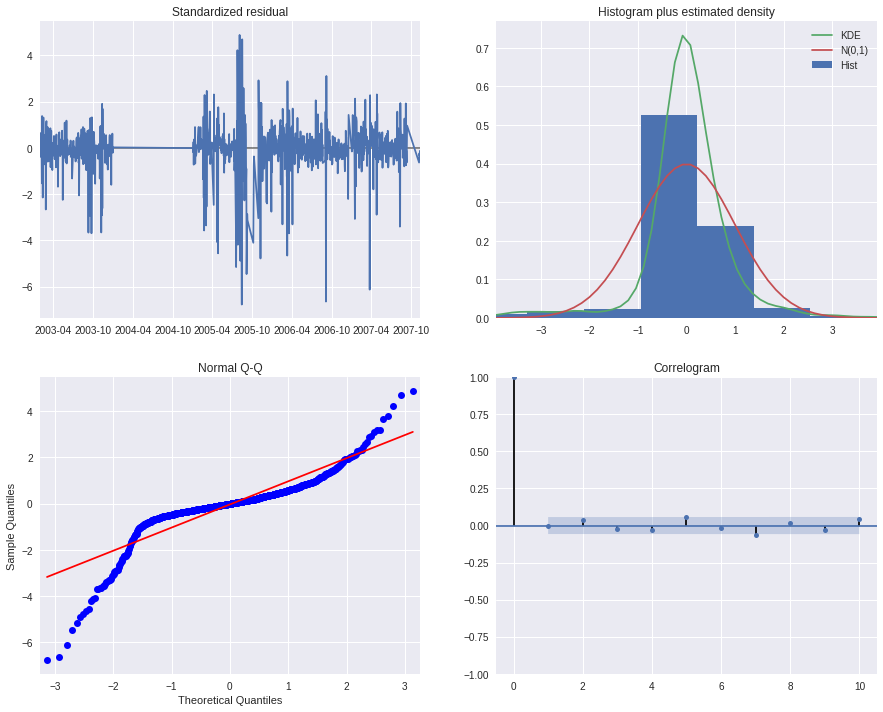

In [41]:
resultIr.plot_diagnostics(figsize=(15,12))
plt.show()

In [42]:
predIr = resultIr.get_prediction(start=pd.to_datetime("2006-01-01"),dynamic=False)
pred_ci_Ir = predIr.conf_int()

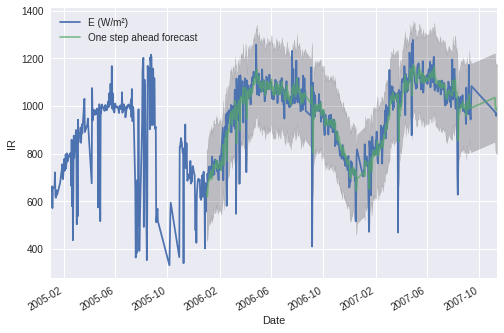

In [43]:
ax = dfIr["2004":].plot(label="observed")
predIr.predicted_mean.plot(ax=ax, label="One step ahead forecast",alpha=0.7)
ax.fill_between(pred_ci_Ir.index,pred_ci_Ir.iloc[:,0],pred_ci_Ir.iloc[:,1],color="k",alpha=0.2)
ax.set_xlabel("Date")
ax.set_ylabel("IR")
plt.legend()
plt.show()

In [44]:
forcast_IR = predIr.predicted_mean
truth_IR = dfIr["2006-01-01":]

In [65]:
forcast_IR = forcast_IR.values.tolist()
truth_IR = truth_IR.values.tolist()
mean_squared_error(truth_IR,forcast_IR)

5888.0497087413823

In [46]:
import itertools
p = q = range(0,4)
pq = list(itertools.product(p,q))

In [48]:
maps = {}
for param in pq:
    try:
        mod = sm.tsa.VARMAX(df_train, order=param, enforce_invertibility=False, enforce_stationarity=False)
        result = mod.fit()
        maps["VAR{}".format(param)] = result.aic
        print("VAR{}-AIC:{}".format(param, result.aic))
    except:
        continue

/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(0, 1)-AIC:30827.9476830413


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(0, 2)-AIC:31025.67388336439


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(0, 3)-AIC:30976.13260840495
VAR(1, 0)-AIC:21899.475200330424


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/varmax.py:153: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(1, 1)-AIC:21829.80815451859


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(1, 2)-AIC:21806.279381013548


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(1, 3)-AIC:21774.879047286155


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/tools/numdiff.py:202: RuntimeWarning: overflow encountered in true_divide
  for i, ih in enumerate(increments)]


VAR(2, 0)-AIC:1966270069.008124


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(2, 1)-AIC:21746.23887297023


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(2, 2)-AIC:21696.089842854148


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(2, 3)-AIC:21695.544163097533
VAR(3, 0)-AIC:2925272732.176426
VAR(3, 1)-AIC:3541536099.1312265


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(3, 2)-AIC:21691.191525563536


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(3, 3)-AIC:21657.626444158574


In [49]:
sorted(maps.items(), key=lambda x: x[1])

[('VAR(3, 3)', 21657.626444158574),
 ('VAR(3, 2)', 21691.191525563536),
 ('VAR(2, 3)', 21695.544163097533),
 ('VAR(2, 2)', 21696.089842854148),
 ('VAR(2, 1)', 21746.238872970229),
 ('VAR(1, 3)', 21774.879047286155),
 ('VAR(1, 2)', 21806.279381013548),
 ('VAR(1, 1)', 21829.808154518589),
 ('VAR(1, 0)', 21899.475200330424),
 ('VAR(0, 1)', 30827.9476830413),
 ('VAR(0, 3)', 30976.132608404951),
 ('VAR(0, 2)', 31025.67388336439),
 ('VAR(2, 0)', 1966270069.0081241),
 ('VAR(3, 0)', 2925272732.1764259),
 ('VAR(3, 1)', 3541536099.1312265)]

In [51]:
varmode = sm.tsa.VARMAX(df_train, order=(3,3),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
result_var = varmode.fit()
print(result_var.summary().tables[1])

/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/varmax.py:153: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Ljung-Box (Q):              164.31, 148.85   Jarque-Bera (JB):     4117.48, 5887.39
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.05, 1.03   Skew:                      1.44, -1.78
Prob(H) (two-sided):            0.64, 0.74   Kurtosis:                 11.60, 13.25


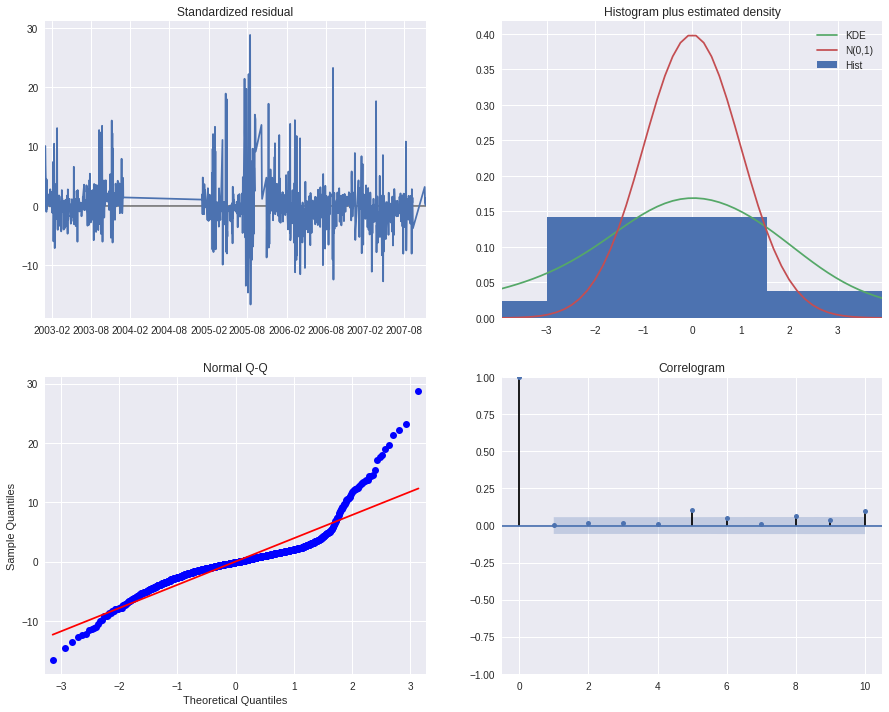

In [52]:
result_var.plot_diagnostics(figsize=(15,12))
plt.show()

In [53]:
pred_var = result_var.get_prediction(start=pd.to_datetime("2006-01-01"),dynamic=False)
pred_ci_var = pred_var.conf_int()

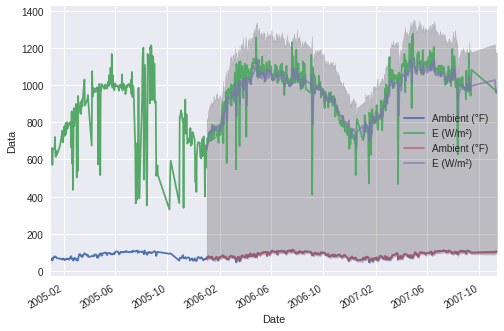

In [55]:
ax = df_train["2004":].plot(label="observed")
pred_var.predicted_mean.plot(ax=ax, label="One step ahead forecast",alpha=0.7)
ax.fill_between(pred_ci_var.index,pred_ci_var.iloc[:,0],pred_ci_Ir.iloc[:,1],color="k",alpha=0.2)
ax.set_xlabel("Date")
ax.set_ylabel("Data")
plt.legend()
plt.show()

In [60]:
forcast_var = pred_var.predicted_mean
truth_var = df_train["2006-01-01":]

In [66]:
forcast_var = forcast_var.values.tolist()
truth_var = truth_var.values.tolist()

In [68]:
forcast_var_ab = list(map(lambda x: x[0], forcast_var))
forcast_var_ir = list(map(lambda x: x[1], forcast_var))
truth_var_ab = list(map(lambda x: x[0], truth_var))
truth_var_ir = list(map(lambda x: x[1], truth_var))

In [ ]:
mse_ab = mean_squared_error(truth_var_ab, forcast_var_ab)
mse_ir = mean_squared_error(truth_var_ir, forcast_var_ir)